(sec-teoremaLC)=
# Teorema del límite central

Matemáticamente el *teorema del límite central* nos dice que

>si $x_1, x_2,...,x_n,...,x_N$ son $N$ variables aleatorias tomadas de una distribución cualquiera con media $\mu$ y desviación estándar $\sigma$, entonces la distribución de la muestra de medias dada por $\frac{1}{N}(x_1+x_2+...+x_n+...x_N)$, corresponderá a una distribución normal de media $\mu$ y desviación estándar $\frac{\sigma}{ \sqrt N}$, para $N \to \infty$.

El resultado de este teorema es de suma importancia porque, si bien, en ocasiones podemos estar interesados en conocer la distribución de los datos que al medir fluctuan de forma aleatoria, en la mayoría de los casos el interés es conocer el valor más probable de la cantidad física, siendo la *fluctuación* un ruido que se desea eliminar. Entonces, lo que realmente interesa es medir con la mayor precisión posible la *media* de la distribución, y lo que dice el teorema del límite central es que sin importar que tipo de distribución tienen nuestros datos aleatorios, si construimos una distribución de los promedios obtenidos con los datos, la distribución siempre será normal o aproximadamente normal.

Esto es muy importante, porque se podrá construir la teoría generalizada del análisis de la incertidumbre a partir de una única distribución, la distribución normal.

Como ejemplo de esto en la {numref}`fig-TLC` (primera columna) se obtuvieron $1\,000$ datos a partir de tres distribuciones: uniforme[^uniforme], normal y de Poisson. Para las dos primeras la media y desviación estándar de la población es $\mu = 2.100$ y $\sigma = 0.500$, respectivamente, mientras que para la tercera la media (valor esperado en el intervalo) es $\mu = 2.100$, que le corresponde una desviación estándar de $\sigma = 1.449$. Allí se observa como la línea y puntos rojos, correspondientes a las funciones de probabilidad determinadas con los parámetros dados y las ecuaciones {eq}`ec-distNormal`, {eq}`ec-distPoisson`, y $\frac{1}{b-a}$[^uniforme], coinciden con los resultados de las distribuciones obtenidas computacionalmente. Si ahora aleatoriamente se toman cinco datos de la distribución de la primera columna, se haya el promedio, y se repite este procedimiento $1\,000$ veces para construir una nueva distribución, se obtiene el resultado de la segunda columna. Se evidencia que las nuevas distribuciones son normales, o aproximadamente normales, con media igual a la de la distribución original, y una desviación estándar igual a $1/\sqrt{5}$ de la desviación estándar original. En la tercera columna se repite el procedimiento pero ahora agrupando de $30$ datos por vez. Como era de esperarse, las distribuciones son normales, con media igual a la original, y con la desviación estándar igual a $1/\sqrt{30}$ la original. En la {numref}`tabla-TLC` se pueden observar las medias y desviaciones estándar para cada caso.

[^uniforme]: La distribución uniforme tiene una función de probabilidad igual a $\frac{1}{b-a}$ para valores de $a \leq x \leq b$, y cero para cualquier otro valor. La media es $\mu = \frac{a+b}{2}$ con desviación estándar igual a $\sigma = \frac{b-a}{\sqrt{12}}$.


```{figure} imagenes/TLC.svg
:name: fig-TLC

Ilustración del teorema del límite central. La primera fila corresponde a datos que siguen una distribución uniforme, es decir, que todos los valores tienen la misma probabilidad de salir. La segunda fila corresponde a datos que siguen una distribución normal, y la tercera datos que siguen una distribución de Poisson. Las distribuciones uniforme y normal tienen media $\mu = 2.100$ y desviación estándar $\sigma = 0.500$. La distribución de Poisson tiene media $\mu = 2.100$. La primera columna muestra el histograma generado computacionalmente a partir de tomar $1\,000$ datos de la distribución. La segunda columna presenta el histograma correspondiente a la distribución muestral de medias cuando se toman de a cinco datos y se promedian, repitiendo el proceso $1\,000$ veces. La tercera columna es para el caso de tomar de a treinta datos y promediar. Para todas las gráficas, la curva roja corresponde a la distribución teórica predicha por el teorema del límite central. Todas las distribuciones teóricas de las columnas dos y tres corresponden a distribuciones normales.
```

```{list-table} Medias y desviaciones estándar para las distribuciones de la figura.
:header-rows: 1
:name: tabla-TLC

* - 
  - $N = 1$
  - $N = 5$
  - $N = 30$
* - Uniforme
  - $\bar x = 2.078$, $s = 0.492$
  - $\bar x = 2.092$, $s = 0.215$
  - $\bar x = 2.101$, $s = 0.089$
* - Normal
  - $\bar x = 2.076$, $s = 0.502$
  - $\bar x = 2.105$, $s = 0.216$
  - $\bar x = 2.099$, $s = 0.086$
* - Poisson
  - $\bar x = 1.968$, $s = 1.423$
  - $\bar x = 2.082$, $s = 0.627$
  - $\bar x = 2.103$, $s = 0.264$
```


```{Admonition} ¡Hazlo tu mismo!

Si quieres cambiar tú mismo los parámetros puedes desplegar la siguiente ventana. Allí encontrarás el programa que genera la gráfica.
```

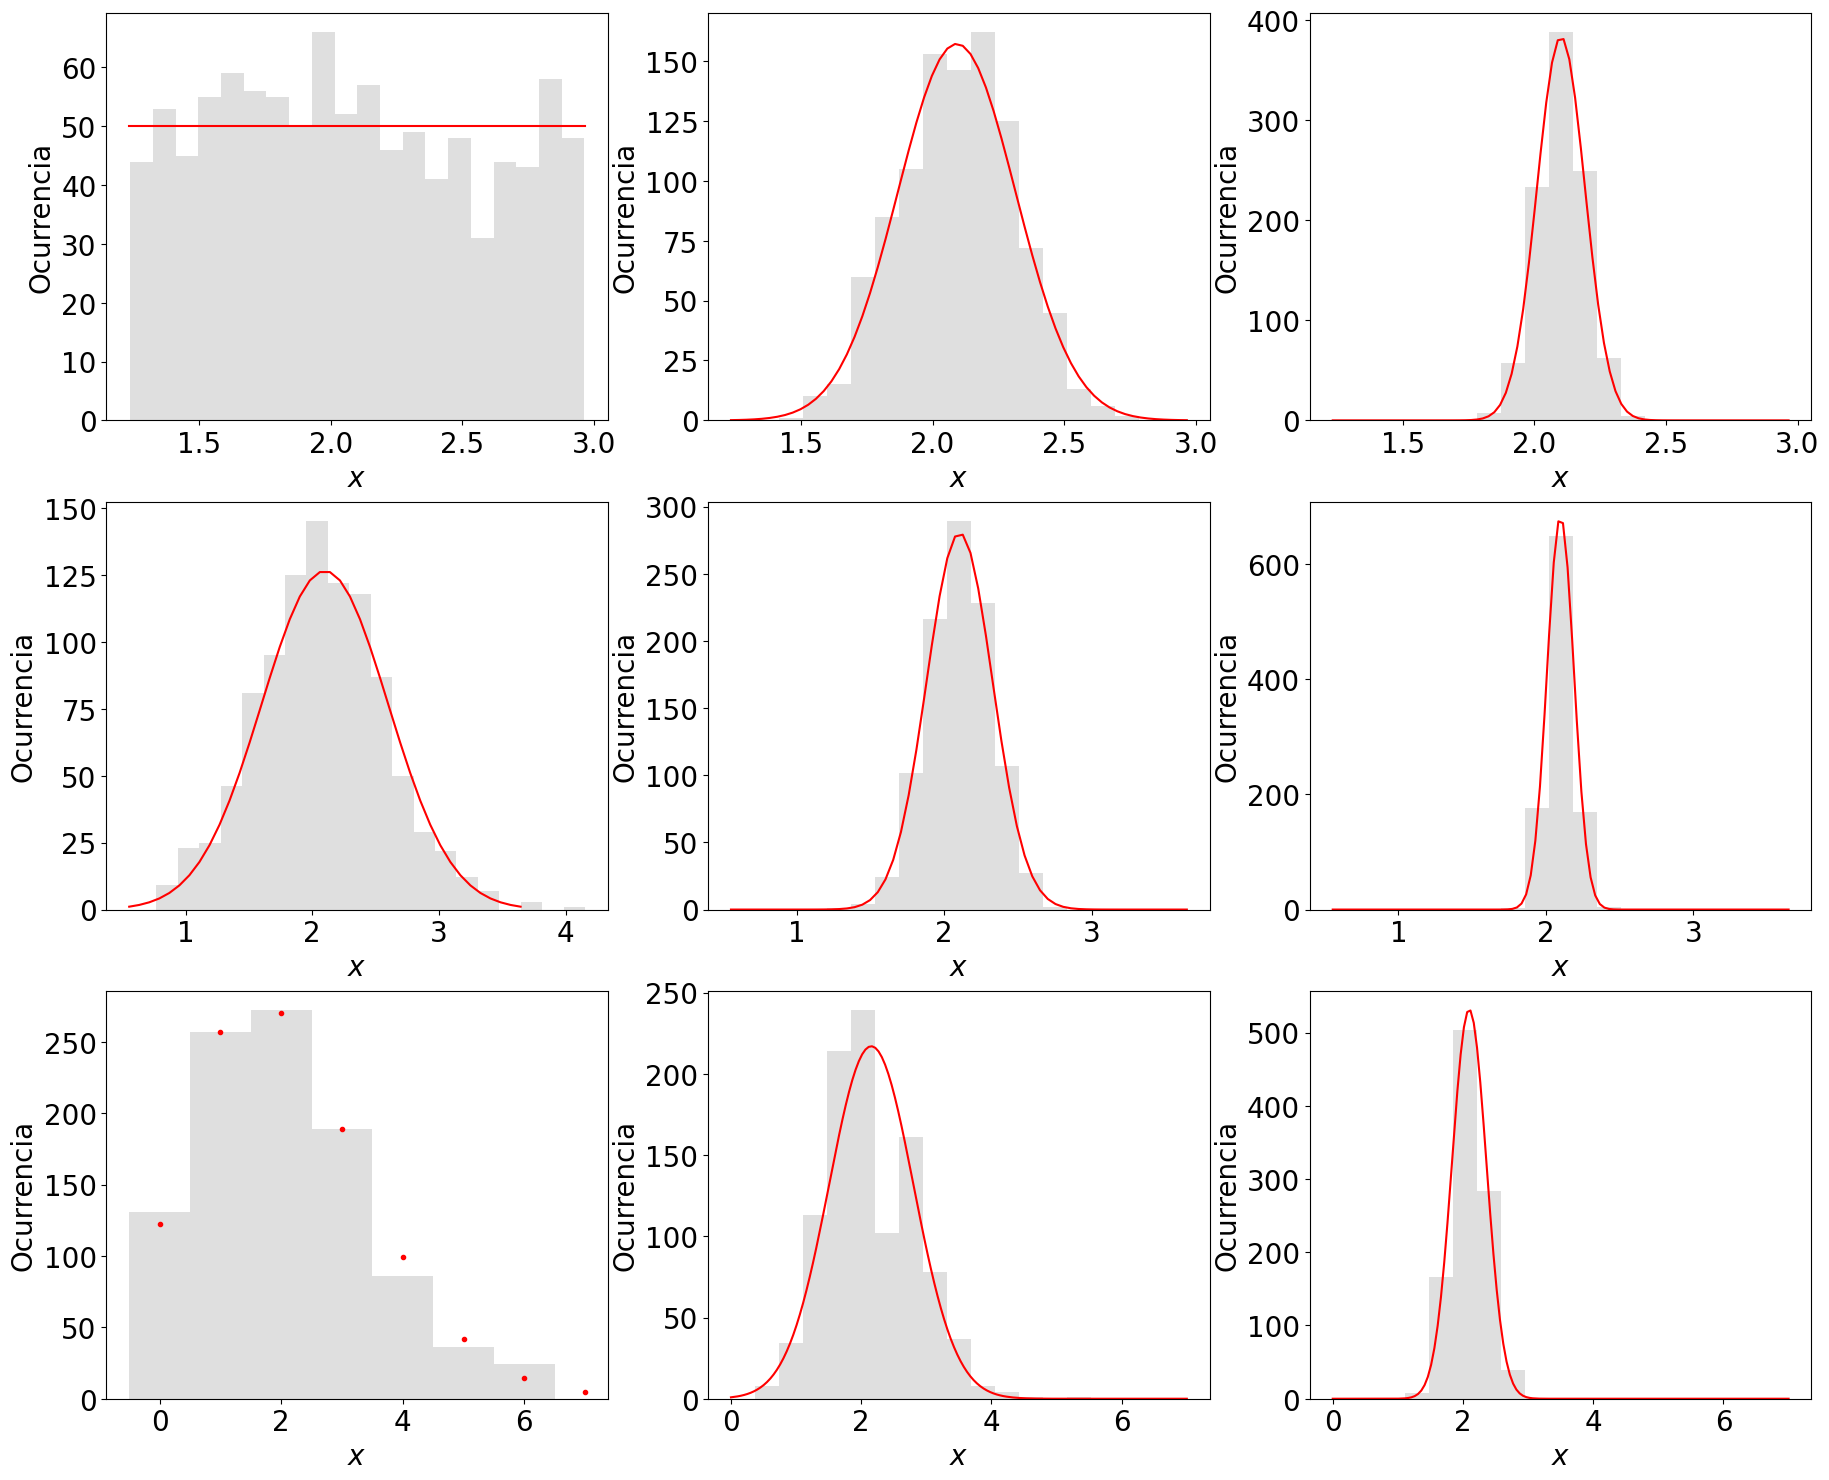

In [1]:
###### Parámetros ##################################################
media = 2.100      # media de la distribución
desv = 0.500       # Desviación estándar de la distribución
N = 1000         # Número de datos de la muestra de la distribución
semilla = 2      # Semilla usada para la generación de las variables aleatorias
n = 20           # Número de intervalos (bins) a graficas en los histogramas
grupA = 5        # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 2)
grupB = 30       # # Cantidad de datos agrupados en cada medida de la distribución muestral de la media (columna 3)
####################################################################

import numpy as np
import pylab as plt
from scipy import stats
from scipy.special import factorial
plt.rcParams.update({'font.size': 20})
np.random.seed(semilla)
figs, axs = plt.subplots(3,3,figsize=(22,18))

def diferP(val0,val):
    return 100*abs(val0-val)/val0


### Distribución Uniforme ###
#############################

def pdfUniform(media,desv):
    b = media + np.sqrt(12)*desv/2
    a = 2*media - b
    pdf = 1/(b-a)
    return a,b,pdf

# Creación de distribución aleatoria
a,b,pdfUni = pdfUniform(media,desv)
alUniforme = np.random.uniform(a,b,size=N)

## Creación de funciones de densidad
x = np.linspace(a,b,n)
dUni = N/(pdfUni*n)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(np.random.uniform(a,b,grupA)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(np.random.uniform(a,b,grupB)))

## Grafica
axs[0,0].hist(alUniforme,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[0,0].plot(x,dUni*pdfUni*np.ones(n),color='r')

# Agrupación A
bins = np.linspace(a,b,n)
axs[0,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvA = desv/np.sqrt(grupA)
mediaA = np.mean(UniA)
bins = np.linspace(a,b,3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[0,1].plot(bins,fUniforme2*dnormal,'r')


# Agrupación B
bins = np.linspace(a,b,n)
axs[0,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
desvB = desv/np.sqrt(grupB)
mediaB = np.mean(UniB)
bins = np.linspace(a,b,4*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 4*len(UniB)*(bins[1]-bins[0])
axs[0,2].plot(bins,fUniforme2*dnormal,'r')


### Distribución normal ###
###########################

# creación distribución aletoria
alnormal = stats.norm.rvs(loc=media,scale=desv,size=N,random_state=semilla)

# creación de función densidad
x1 = np.linspace(stats.norm.ppf(0.001,loc=media,scale=desv),stats.norm.ppf(0.999,loc=media,scale=desv), 2*n)
fnormal = stats.norm.pdf(x1,loc=media,scale=desv)
dnormal = 2*N*(x1[1]-x1[0])

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupA,random_state=None)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(stats.norm.rvs(loc=media,scale=desv,size=grupB,random_state=None)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
        
# Grafica
axs[1,0].hist(alnormal,bins=n, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
axs[1,0].plot(x1,fnormal*dnormal,'r')

# Agrupación A
bins = np.linspace(x1[0],x1[-1],n)
axs[1,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],3*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
dnormal = 3*len(UniA)*(bins[1]-bins[0])
axs[1,1].plot(bins,fUniforme2*dnormal,'r')


# Agrupación B
bins = np.linspace(x1[0],x1[-1],n)
axs[1,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x1[0],x1[-1],5*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
dnormal = 5*len(UniB)*(bins[1]-bins[0])
axs[1,2].plot(bins,fUniforme2*dnormal,'r')
    
        
### Distribución de Poisson ###
###############################

def distP(mu,x):
    return (mu**x)*np.exp(-mu)/factorial(x)

# creación distribución aleatorioa
#alpoisson = stats.poisson.rvs(media,loc=0,size=N,random_state=semilla)
#alpoisson = np.random.Generator.poisson(media,N)
rng = np.random.default_rng()
alpoisson = rng.poisson(media,N)

# creación de función densidad
x2 = np.arange(stats.poisson.ppf(0.001,media),stats.poisson.ppf(0.999,media))
#fpoisson = stats.poisson.pmf(x2,media)
fpoisson = distP(media,x2)

## Agrupación A
UniA = []
for ii in range(N):
        UniA.append(np.mean(rng.poisson(media,grupA)))
        
## Agrupación B
UniB = []
for ii in range(N):
        UniB.append(np.mean(rng.poisson(media,grupB)))

mediaA = np.mean(UniA)
mediaB = np.mean(UniB)
desvA = np.sqrt(media/grupA)
desvB = np.sqrt(media/grupB)
        
# Grafica
nn,bini,pp = axs[2,0].hist(alpoisson,bins=x2, histtype='stepfilled', align='left',color='silver', alpha=0.5)
axs[2,0].plot(x2,fpoisson*N,'r.')

# Agrupación A
bins = np.linspace(x2[0],x2[-1],n)
axs[2,1].hist(UniA,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaA,scale=desvA)
fUniforme3 = stats.norm.pdf(bins,loc=mediaA,scale=np.std(UniA))
dnormal = 7*len(UniA)*(bins[1]-bins[0])
axs[2,1].plot(bins,fUniforme2*dnormal,'r')
#axs[2,1].plot(bins,fUniforme3*dnormal,'gray')

# Agrupación B
bins = np.linspace(x2[0],x2[-1],n)
axs[2,2].hist(UniB,bins=bins, histtype='stepfilled', align='mid',color='silver', alpha=0.5)
bins = np.linspace(x2[0],x2[-1],7*n)
fUniforme2 = stats.norm.pdf(bins,loc=mediaB,scale=desvB)
fUniforme3 = stats.norm.pdf(bins,loc=mediaB,scale=np.std(UniB))
dnormal = 7*len(UniB)*(bins[1]-bins[0])
axs[2,2].plot(bins,fUniforme2*dnormal,'r')
#axs[2,2].plot(bins,fUniforme3*dnormal,'gray')

for ax in axs.flat:
    ax.set(xlabel='$x$', ylabel='Ocurrencia')
plt.show()

```{seealso}

Referencias sobre el teorema del límite central en la sección 3.5 de {cite}`Hughes2010` y en la sección 3.8 de {cite}`Squires2001`.

```